# Introduction

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to apply what you've learned and move up the leaderboard.

Begin by running the code cell below to set up code checking and the filepaths for the dataset.

In [2]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# Set up filepaths
import os

In [3]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
iowa_file_path = '../99_Data/data_for_ml_course/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model= {=,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 21,857


# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [8]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [155]:
def get_nb_estimators_RF(model,
                         name_gsearch,
                         nb_estim_values,
                         f_test_x,
                         f_test_y,
                         f_train_x,
                         f_train_y):
        
    test_mae = []
    train_mae = []

    resultats = {}    

    for i in nb_estim_values:
        mod = model (
                        bootstrap = True,
                        ccp_alpha = 0.0,
                        criterion= 'absolute_error',
                        max_depth= 3,
                        max_features= 0.5,
                        max_leaf_nodes= 6,
                        max_samples= 0.2,
                        min_impurity_decrease= 0.5,
                        min_samples_leaf= 0.01,
                        min_samples_split= 2,
                        min_weight_fraction_leaf= 0.0,
                        n_jobs= None,
                        oob_score= False,
                        random_state= 1235,
                        verbose= 0,
                        warm_start= False,
                        n_estimators = i
                    )    
        mod.fit(f_train_x, f_train_y)
        pred_mod_test = mod.predict(f_test_x)
        pred_mod_train = mod.predict(f_train_x)
        
        test_mae.append(mean_absolute_error(f_test_y, pred_mod_test))
        train_mae.append(mean_absolute_error(f_train_y, pred_mod_train))
                
    resultats['test_mae'] = test_mae
    resultats['train_mae'] = train_mae
        
    return pd.DataFrame(resultats)

In [156]:
nb_estim_df = get_nb_estimators_RF(RandomForestRegressor,
                                gsearch_RF,
                                range(1, 50),
                                val_X,
                                val_y,
                                train_X,
                                train_y)

print("Validation min MAE for Random Forest Model: {:,.0f}".format(nb_estim_df.loc[len(nb_estim_df)-1]['test_mae']))
print("Training min MAE for Random Forest Model: {:,.0f}".format(nb_estim_df.loc[len(nb_estim_df)-1]['train_mae']))

Validation min MAE for Random Forest Model: 32,308
Training min MAE for Random Forest Model: 30,479


In [157]:
import matplotlib.pyplot as plt

def show_mae_evol_RF(
    evol_mae_df
):

    nb_iterations = len(evol_mae_df)
    x_axis = range(0, nb_iterations)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(x_axis, evol_mae_df[nb_estim_df.keys()[1]], label='Train')
    ax.plot(x_axis, evol_mae_df[nb_estim_df.keys()[0]], label='Test')
    ax.legend()
    ax.set_ylabel('MAE')
    ax.set_xlabel('n_estimators')
    ax.set_title('RF MAE')
    plt.show()

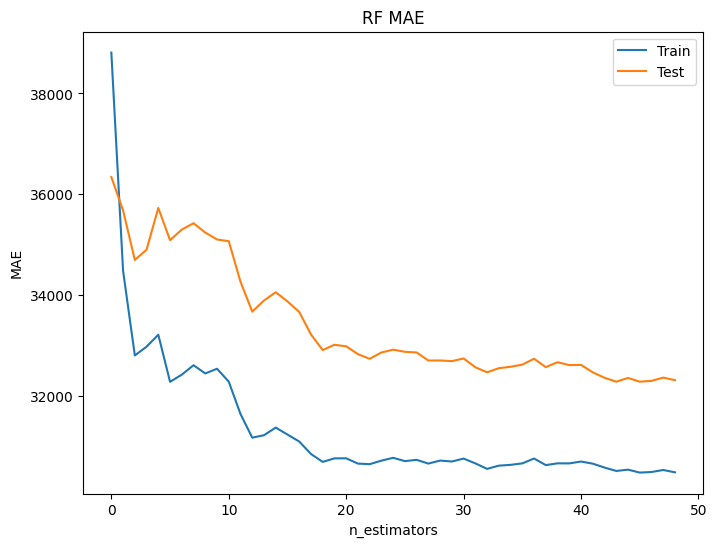

In [158]:
show_mae_evol_RF(nb_estim_df)

In [160]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(               
    bootstrap = True,
    ccp_alpha = 0.0,
    criterion= 'absolute_error',
    max_depth= 3,
    max_features= 0.5,
    max_leaf_nodes= 6,
    max_samples= 0.2,
    min_impurity_decrease= 0.5,
    min_samples_leaf= 0.01,
    min_samples_split= 2,
    min_weight_fraction_leaf= 0.0,
    n_jobs= None,
    oob_score= False,
    random_state= 1,
    verbose= 0,
    warm_start= False,
    n_estimators = 20
    )

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(criterion='absolute_error', max_depth=3, max_features=0.5,
                      max_leaf_nodes=6, max_samples=0.2,
                      min_impurity_decrease=0.5, min_samples_leaf=0.01,
                      n_estimators=20, random_state=1)

Now, read the file of "test" data, and apply your model to make predictions.

In [161]:
# path to file you will use for predictions
test_data_path = '../99_Data/data_for_ml_course/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

Before submitting, run a check to make sure your `test_preds` have the right format.

In [162]:
# Check your answer (To get credit for completing the exercise, you must get a "Correct" result!)
step_1.check()
# step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [164]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('../99_Data/data_for_ml_course/submission.csv', index=False)